In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

import io
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from numpy import mean
from numpy import std
import statsmodels.api as sm

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving data_before_modelling-new.csv to data_before_modelling-new.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['data_before_modelling-new.csv']))

In [ ]:
data.shape

(800, 20)

In [ ]:
data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,Class/ASD,age_group
0,1,0,1,0,1,0,1,0,1,1,0,5,0,0,7,0,6.351166,4,0,2
1,0,0,0,0,0,0,0,0,0,0,1,5,0,0,25,0,2.255185,4,0,3
2,1,1,1,1,1,1,1,1,1,1,1,9,0,1,54,0,14.851484,4,1,0
3,0,0,0,0,0,0,0,0,0,0,0,5,0,0,54,0,2.276617,4,0,2
4,0,0,0,0,0,0,0,0,0,0,1,5,0,0,46,0,-4.777286,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,1,0,0,0,0,0,0,1,1,1,2,0,0,36,0,12.999501,4,0,1
796,0,1,1,0,0,1,0,1,1,1,1,9,0,0,17,0,13.561518,4,0,1
797,0,0,0,0,0,0,0,0,0,0,1,7,1,0,36,0,2.653177,4,0,0
798,0,0,0,0,0,0,0,0,0,0,0,5,0,0,15,0,9.069342,4,0,1


# Combination of Over and Under Sampling

In [ ]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'ethnicity',
       'jaundice', 'autism', 'country_of_res', 'used_app_before', 'result',
       'relation', 'Class/ASD', 'age_group'],
      dtype='object')

In [ ]:
#from imblearn.over_sampling import SMOTE

from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [ ]:

# Separate input features and target
X = data.drop('Class/ASD', axis=1)
y = data['Class/ASD']


In [ ]:
y.value_counts()

0    639
1    161
Name: Class/ASD, dtype: int64

In [ ]:
sm = SMOTEENN(enn = EditedNearestNeighbours(sampling_strategy='all', kind_sel="mode"), random_state = 42, n_jobs =-1)

In [ ]:
X_resampled, y_resampled = sm.fit_resample(X, y)

# Check the class distribution of the target after oversampling
y_resampled.value_counts()

1    626
0    486
Name: Class/ASD, dtype: int64

<Axes: xlabel='Class/ASD', ylabel='count'>

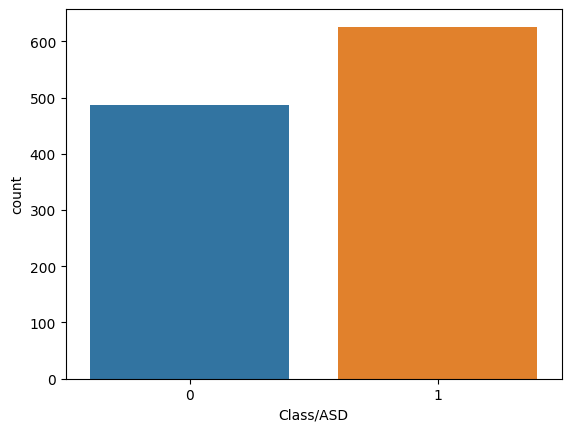

In [ ]:
sns.countplot(x=y_resampled)

In [ ]:
X_resampled

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,age_group
0,0,0,0,0,0,0,0,0,0,0,1,5,0,0,25,0,2.255185,4,3
1,0,0,0,0,0,0,0,0,0,0,0,5,0,0,54,0,2.276617,4,2
2,0,0,0,0,0,0,0,0,0,0,1,5,0,0,46,0,-4.777286,4,3
3,1,0,0,0,0,1,0,0,1,1,1,4,0,0,31,0,9.562117,4,2
4,1,0,0,0,0,0,1,1,1,0,0,6,0,0,53,0,7.984569,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,1,1,0,1,1,0,0,1,0,1,0,1,0,1,15,0,12.708080,4,2
1108,1,1,1,1,0,0,0,0,1,1,1,5,0,0,32,0,12.840234,4,2
1109,1,1,1,1,1,1,1,1,1,1,0,9,0,0,53,0,11.125145,4,2
1110,1,1,1,1,1,1,1,1,1,1,0,9,0,0,53,0,11.023193,4,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmaxscale = MinMaxScaler(feature_range = (0, 1))
scaled_x = minmaxscale.fit_transform(X_resampled)
scaled_x = pd.DataFrame(scaled_x)

In [ ]:
scaled_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.555556,0.0,0.0,0.454545,0.0,0.381655,1.0,0.75
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.555556,0.0,0.0,0.981818,0.0,0.382630,1.0,0.50
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.555556,0.0,0.0,0.836364,0.0,0.061865,1.0,0.75
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.444444,0.0,0.0,0.563636,0.0,0.713926,1.0,0.50
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.666667,0.0,0.0,0.963636,0.0,0.642190,1.0,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.111111,0.0,1.0,0.272727,0.0,0.856984,1.0,0.50
1108,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.555556,0.0,0.0,0.581818,0.0,0.862994,1.0,0.50
1109,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.000000,0.0,0.0,0.963636,0.0,0.785003,1.0,0.50
1110,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.000000,0.0,0.0,0.963636,0.0,0.780366,1.0,0.25


# Splitting into train and test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y_resampled, train_size=0.8, random_state=1, stratify=y_resampled)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((889, 19), (889,), (223, 19), (223,))

# Without Feature selection

# Multinomial Naive Bayes

In [ ]:
mnb = MultinomialNB(alpha=1.0, class_prior=[0.5,0.5])
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)


In [ ]:
confmat= pd.DataFrame(confusion_matrix(y_test,y_pred),
                     index=['True[0]','True[1]'],
                     columns=['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],77,20
True[1],10,116


In [ ]:
print('classification report')
print(classification_report(y_test,y_pred))

classification report
              precision    recall  f1-score   support

           0       0.89      0.79      0.84        97
           1       0.85      0.92      0.89       126

    accuracy                           0.87       223
   macro avg       0.87      0.86      0.86       223
weighted avg       0.87      0.87      0.86       223



In [ ]:
TP = 116
TN = 77
FP = 20
FN = 10

Classification Accuracy:

In [ ]:
print('Accuracy - ', (TP + TN) / float(TP + TN + FP + FN))
print('Sensitivity/Recall -', metrics.recall_score(y_test, y_pred))
print('Specificity -', (TN / (TN + FP)))
print('Precision - ', metrics.precision_score(y_test, y_pred) )
print('False Positive Rate - ', (FP / float(TN + FP)))

Accuracy -  0.8654708520179372
Sensitivity/Recall - 0.9206349206349206
Specificity - 0.7938144329896907
Precision -  0.8529411764705882
False Positive Rate -  0.20618556701030927


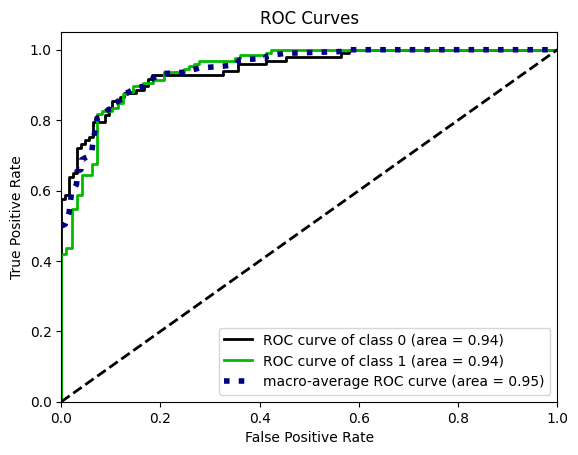

In [ ]:
skplt.metrics.plot_roc(y_test, mnb.predict_proba(x_test),plot_micro=False)
plt.show()

# Decision Tree Classifier

In [ ]:
tree = DecisionTreeClassifier(random_state=40)
tree.fit(x_train,y_train)
y_train_pred=tree.predict(x_train)
y_test_pred=tree.predict(x_test)

In [ ]:
tree.get_depth()

12

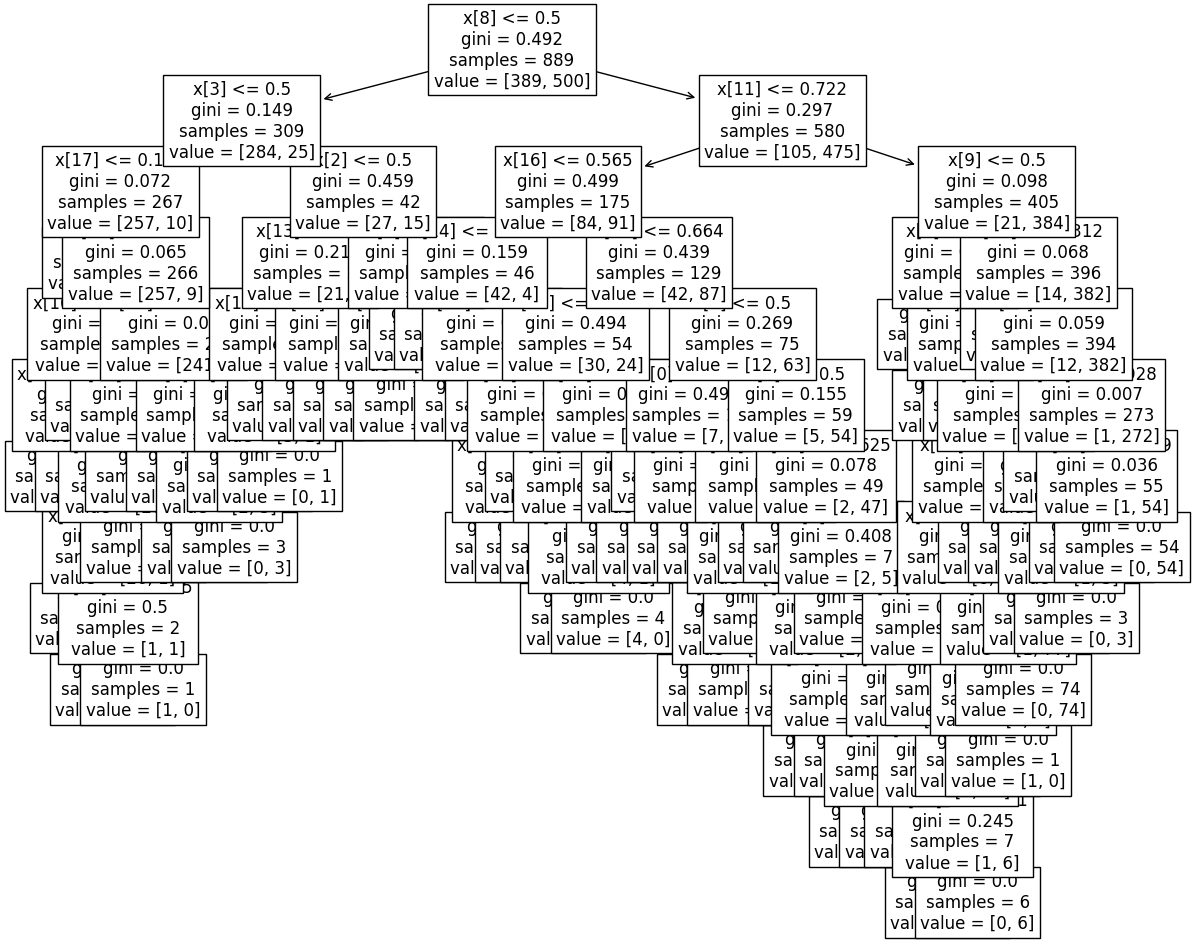

In [ ]:
plt.figure(figsize=(14,12))
plot_tree(tree,fontsize=12)
plt.show()

In [ ]:
print(accuracy_score(y_train,y_train_pred),round(accuracy_score(y_test,y_test_pred),2))

1.0 0.93


In [ ]:
path=tree.cost_complexity_pruning_path(x_train,y_train)
alphas=path['ccp_alphas']

alphas

array([0.        , 0.00074991, 0.00098425, 0.00105456, 0.00106862,
       0.00107129, 0.0010832 , 0.00111044, 0.00112074, 0.00114721,
       0.00140799, 0.00149981, 0.00149981, 0.00168729, 0.0019685 ,
       0.00199975, 0.00200552, 0.00216937, 0.00218638, 0.00226311,
       0.00265866, 0.00272743, 0.00299963, 0.00385666, 0.00394854,
       0.00420817, 0.0043597 , 0.00449944, 0.00520667, 0.00678933,
       0.00686968, 0.00717149, 0.00834425, 0.01091227, 0.01105118,
       0.02632676, 0.0503943 , 0.24705608])

In [ ]:
len(alphas)

38

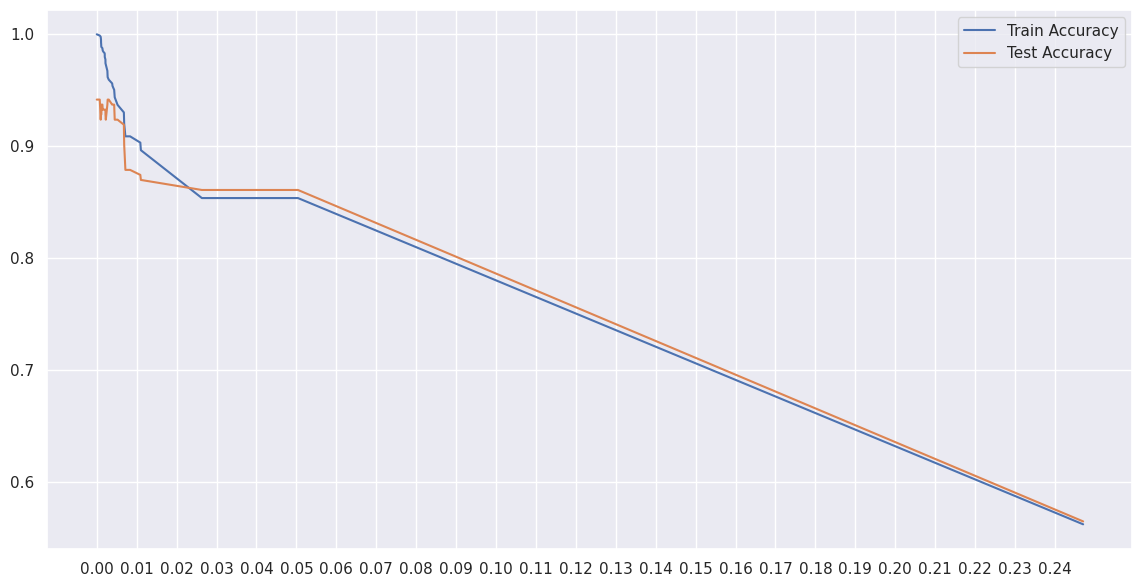

In [ ]:
accuracy_train,accuracy_test=[],[]

for i in alphas:
    tree=DecisionTreeClassifier(ccp_alpha=i)

    tree.fit(x_train,y_train)
    y_train_pred=tree.predict(x_train)
    y_test_pred=tree.predict(x_test)

    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))


sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=alphas,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alphas,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

In [ ]:
tree = DecisionTreeClassifier(ccp_alpha=0.00520667,random_state=40)
tree.fit(x_train,y_train)
y_train_pred=tree.predict(x_train)
y_test_pred=tree.predict(x_test)

print(accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred))

0.937007874015748 0.9237668161434978


In [ ]:
tree.get_depth()

7

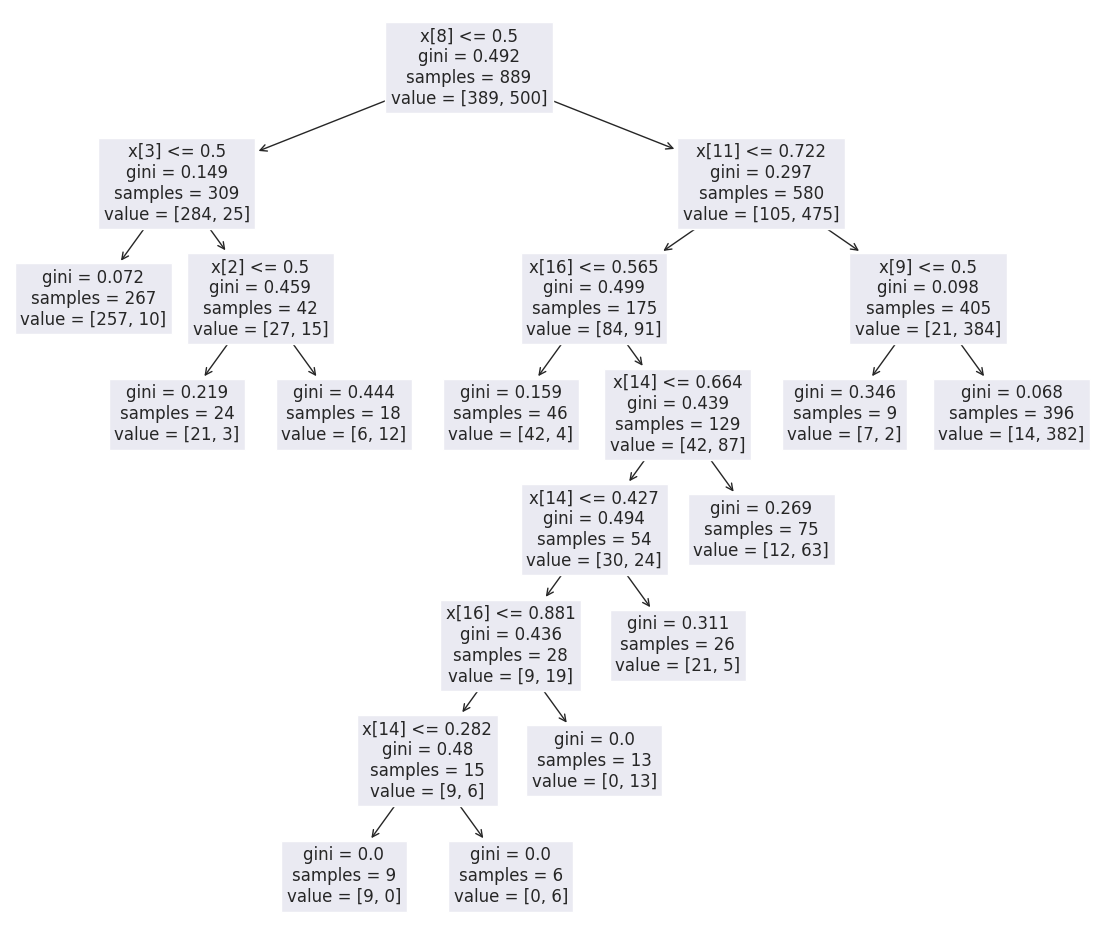

In [ ]:
plt.figure(figsize=(14,12))
plot_tree(tree,fontsize=12)
plt.show()

In [ ]:
confmat_RF= pd.DataFrame(confusion_matrix(y_test,y_test_pred),
                     index=['True[0]','True[1]'],
                     columns=['Predict[0]','Predict[1]'])
confmat_RF

,Predict[0],Predict[1]
True[0],84,13
True[1],4,122


In [ ]:
TP = 122
TN = 84
FP = 13
FN = 4

In [ ]:
print('classification report')
print(classification_report(y_test,y_test_pred))

classification report
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        97
           1       0.90      0.97      0.93       126

    accuracy                           0.92       223
   macro avg       0.93      0.92      0.92       223
weighted avg       0.93      0.92      0.92       223



Classification Accuracy:

In [ ]:
print('Accuracy - ', (TP + TN) / float(TP + TN + FP + FN))
print('Sensitivity/Recall -', metrics.recall_score(y_test, y_test_pred))
print('Specificity -', (TN / (TN + FP)))
print('Precision - ', metrics.precision_score(y_test, y_test_pred) )
print('False Positive Rate - ', (FP / float(TN + FP)))

Accuracy -  0.9237668161434978
Sensitivity/Recall - 0.9682539682539683
Specificity - 0.865979381443299
Precision -  0.9037037037037037
False Positive Rate -  0.13402061855670103


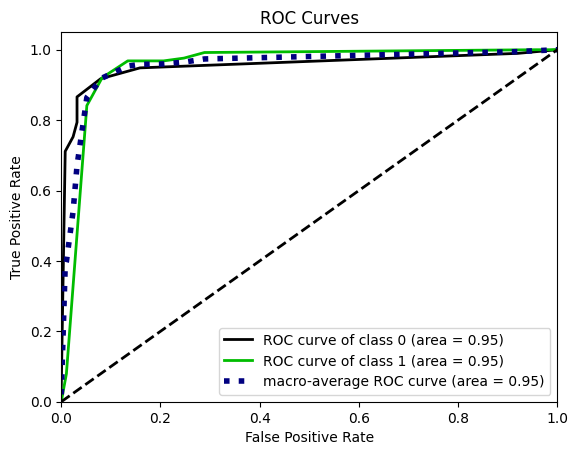

In [ ]:
skplt.metrics.plot_roc(y_test, tree.predict_proba(x_test),plot_micro=False)
plt.show()

# Random Forest Classifier

In [ ]:
RF_tree = RandomForestClassifier(random_state=40)
RF_tree.fit(x_train,y_train)
y_train_pred_RF=RF_tree.predict(x_train)
y_test_pred_RF=RF_tree.predict(x_test)

In [ ]:
print(accuracy_score(y_train,y_train_pred_RF),round(accuracy_score(y_test,y_test_pred_RF),2))

1.0 0.97


In [ ]:
RF_tree = RandomForestClassifier(ccp_alpha=0.0, random_state=40,max_depth=7)
RF_tree.fit(x_train,y_train)
y_train_pred_RF=RF_tree.predict(x_train)
y_test_pred_RF=RF_tree.predict(x_test)

print(accuracy_score(y_train,y_train_pred_RF),accuracy_score(y_test,y_test_pred_RF))

0.984251968503937 0.9641255605381166


In [ ]:
confmat_RF= pd.DataFrame(confusion_matrix(y_test,y_test_pred_RF),
                     index=['True[0]','True[1]'],
                     columns=['Predict[0]','Predict[1]'])
confmat_RF

,Predict[0],Predict[1]
True[0],90,7
True[1],1,125


In [ ]:
TP = 125
TN = 90
FP = 7
FN = 1

Classification Accuracy:

In [ ]:
print('Accuracy - ', (TP + TN) / float(TP + TN + FP + FN))
print('Sensitivity/Recall -', metrics.recall_score(y_test, y_test_pred_RF))
print('Specificity -', (TN / (TN + FP)))
print('Precision - ', metrics.precision_score(y_test, y_test_pred_RF) )
print('False Positive Rate - ', (FP / float(TN + FP)))

Accuracy -  0.9641255605381166
Sensitivity/Recall - 0.9920634920634921
Specificity - 0.9278350515463918
Precision -  0.946969696969697
False Positive Rate -  0.07216494845360824


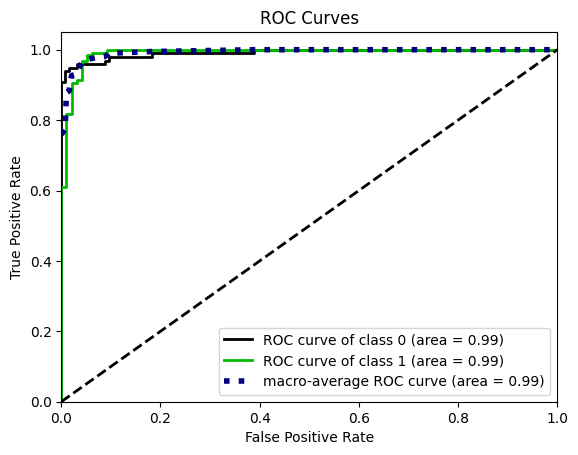

In [ ]:
skplt.metrics.plot_roc(y_test, RF_tree.predict_proba(x_test),plot_micro=False)
plt.show()

## Feature selection method - Feature Importance

Text(0.5, 0, 'Random Forest Feature Importance')

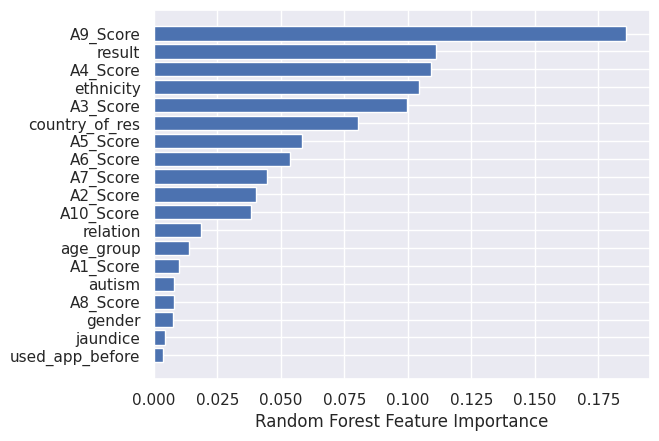

In [ ]:
sorted_idx = RF_tree.feature_importances_.argsort()
plt.barh(X_resampled.columns[sorted_idx], RF_tree.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# Logistic Regression

In [ ]:
LR = LogisticRegression(solver='liblinear',penalty ='l2', random_state=1) #keeping deafult penalty L2
LR.fit(x_train,y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [ ]:
y_train_pred_LR=LR.predict(x_train)
y_pred_LR = LR.predict(x_test)

In [ ]:
print(accuracy_score(y_train,y_train_pred_LR),round(accuracy_score(y_test,y_pred_LR),2))

0.9111361079865017 0.91


In [ ]:
confmat_LR= pd.DataFrame(confusion_matrix(y_test,y_pred_LR),
                     index=['True[0]','True[1]'],
                     columns=['Predict[0]','Predict[1]'])
confmat_LR

,Predict[0],Predict[1]
True[0],83,14
True[1],6,120


In [ ]:
TP = 120
TN = 83
FP = 14
FN = 6

In [ ]:
print('Accuracy - ', (TP + TN) / float(TP + TN + FP + FN))
print('Specificity -', (TN / (TN + FP)))
print('False Positive Rate - ', (FP / float(TN + FP)))

Accuracy -  0.9103139013452914
Specificity - 0.8556701030927835
False Positive Rate -  0.14432989690721648


Classification Accuracy:

In [ ]:
print('Accuracy - ', (TP + TN) / float(TP + TN + FP + FN))
print('Sensitivity/Recall -', metrics.recall_score(y_test, y_pred_LR))
print('Specificity -', (TN / (TN + FP)))
print('Precision - ', metrics.precision_score(y_test, y_pred_LR) )
print('False Positive Rate - ', (FP / float(TN + FP)))

Accuracy -  0.9237668161434978
Sensitivity/Recall - 0.9523809523809523
Specificity - 0.865979381443299
Precision -  0.8955223880597015
False Positive Rate -  0.13402061855670103


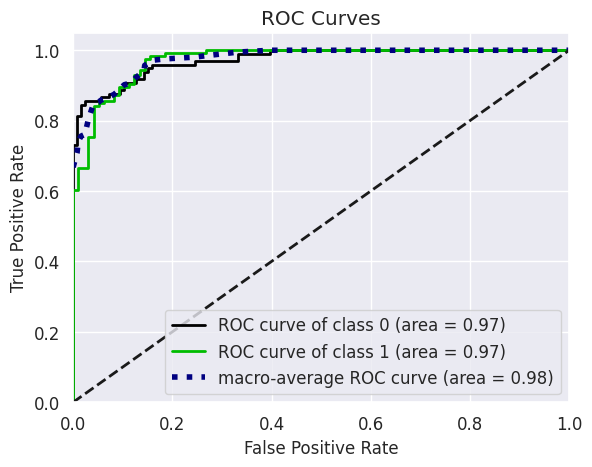

In [ ]:
skplt.metrics.plot_roc(y_test, LR.predict_proba(x_test),plot_micro=False)
plt.show()

# Feature selection methods

## Odds ratio

In [ ]:
import statsmodels.api as sma

logistic_ml=sma.Logit(y_resampled,X_resampled)
logi_coef=logistic_ml.fit()
logi_coef.summary2()

Optimization terminated successfully.
         Current function value: 0.241918
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.647      
Dependent Variable: Class/ASD        AIC:              576.0265   
Date:               2023-05-03 01:23 BIC:              671.2909   
No. Observations:   1112             Log-Likelihood:   -269.01    
Df Model:           18               LL-Null:          -761.94    
Df Residuals:       1093             LLR p-value:      7.3629e-198
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
A1_Score          -0.3033   0.2621  -1.1571 0.2472 -0.8171  0.2105
A2_Score           0.7415   0.2713   2.7334 0.0063  0.2098  1.2732
A3_Score           1.1545   0.2868   4.0260 0.0001  0.5925  1.7166
A4_Score           1.6165   0.2853   5.6667 0.0000  1.0574  2.1756
A5_Score           0.9766   0.2876   3.3956 0.0007  0.4129  1.5403
A6_Score           1.2836   0.2793   4.5956 0.0000  0.7362  1.8310
A7_Score          -0.2567   0.2946  -0.8711 0.3837 -0.8342  0.3208
A8_Score           0.1982   0.2423   0.8181 0.4133 -0.2767  0.6732
A9_Score           1.8877   0.2956   6.3856 0.0000  1.3083  2.4671
A10_Score         -0.3768   0.3019  -1.2481 0.2120 -0.9685  0.2149
gender            -0.8093   0.2305  -3.5105 0.0004 -1.2611 -0.3574
ethnicity          0.1076   0.0409   2.6307 0.0085  0.0274  0.1877
jaundice          -0.7383   0.2991  -2.4685 0.0136 -1.3244 -0.1521
autism             0.1559   0.3556   0.4383 0.6612 -0.5411  0.8528
country_of_res    -0.0086   0.0067  -1.2802 0.2005 -0.0218  0.0046
used_app_before   -1.1714   0.4501  -2.6025 0.0093 -2.0535 -0.2892
result             0.1505   0.0296   5.0866 0.0000  0.0925  0.2085
relation          -1.1827   0.1157 -10.2196 0.0000 -1.4095 -0.9559
age_group         -0.1696   0.1089  -1.5572 0.1194 -0.3830  0.0439
==================================================================

"""

In [ ]:
print(logi_coef.params)

A1_Score          -0.303327
A2_Score           0.741524
A3_Score           1.154510
A4_Score           1.616514
A5_Score           0.976578
A6_Score           1.283587
A7_Score          -0.256661
A8_Score           0.198239
A9_Score           1.887737
A10_Score         -0.376813
gender            -0.809290
ethnicity          0.107555
jaundice          -0.738263
autism             0.155858
country_of_res    -0.008617
used_app_before   -1.171370
result             0.150527
relation          -1.182697
age_group         -0.169556
dtype: float64


In [ ]:
print('Odds ratio are as shown below')
print(np.exp(logi_coef.params))

Odds ratio are as shown below
A1_Score           0.738357
A2_Score           2.099133
A3_Score           3.172468
A4_Score           5.035505
A5_Score           2.655355
A6_Score           3.609566
A7_Score           0.773631
A8_Score           1.219253
A9_Score           6.604409
A10_Score          0.686044
gender             0.445174
ethnicity          1.113552
jaundice           0.477943
autism             1.168660
country_of_res     0.991420
used_app_before    0.309942
result             1.162447
relation           0.306451
age_group          0.844039
dtype: float64


In [ ]:
print(logi_coef.pvalues<0.1)

A1_Score           False
A2_Score            True
A3_Score            True
A4_Score            True
A5_Score            True
A6_Score            True
A7_Score           False
A8_Score           False
A9_Score            True
A10_Score          False
gender              True
ethnicity           True
jaundice            True
autism             False
country_of_res     False
used_app_before     True
result              True
relation            True
age_group          False
dtype: bool


## Chi Square

In [ ]:
resampled_data=X_resampled.join(y_resampled)

In [ ]:
resampled_data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation,age_group,Class/ASD
0,0,0,0,0,0,0,0,0,0,0,1,5,0,0,25,0,2.255185,4,3,0
1,0,0,0,0,0,0,0,0,0,0,0,5,0,0,54,0,2.276617,4,2,0
2,0,0,0,0,0,0,0,0,0,0,1,5,0,0,46,0,-4.777286,4,3,0
3,1,0,0,0,0,1,0,0,1,1,1,4,0,0,31,0,9.562117,4,2,0
4,1,0,0,0,0,0,1,1,1,0,0,6,0,0,53,0,7.984569,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,1,1,0,1,1,0,0,1,0,1,0,1,0,1,15,0,12.708080,4,2,1
1108,1,1,1,1,0,0,0,0,1,1,1,5,0,0,32,0,12.840234,4,2,1
1109,1,1,1,1,1,1,1,1,1,1,0,9,0,0,53,0,11.125145,4,2,1
1110,1,1,1,1,1,1,1,1,1,1,0,9,0,0,53,0,11.023193,4,1,1


In [ ]:
def chi2_calc(df,target):
    scores=[]
    for col in df.columns:
        ct=pd.crosstab(df[col],target)
        stat,p,dof,expected=chi2_contingency(ct)
        scores.append(p)
    return pd.DataFrame(scores, index=df.columns, columns=['P value']).sort_values(by='P value')

In [ ]:
chi2_calc(resampled_data[resampled_data.columns.difference(['result'])],resampled_data['Class/ASD'])

,P value
Class/ASD,6.213423e-243
A9_Score,1.958013e-123
ethnicity,1.492661e-115
A4_Score,1.601689e-115
A3_Score,6.608902e-113
A5_Score,4.026656e-96
A6_Score,9.492527e-96
country_of_res,1.809455e-93
A2_Score,2.391242e-81
A7_Score,2.267194e-80


## Correlation

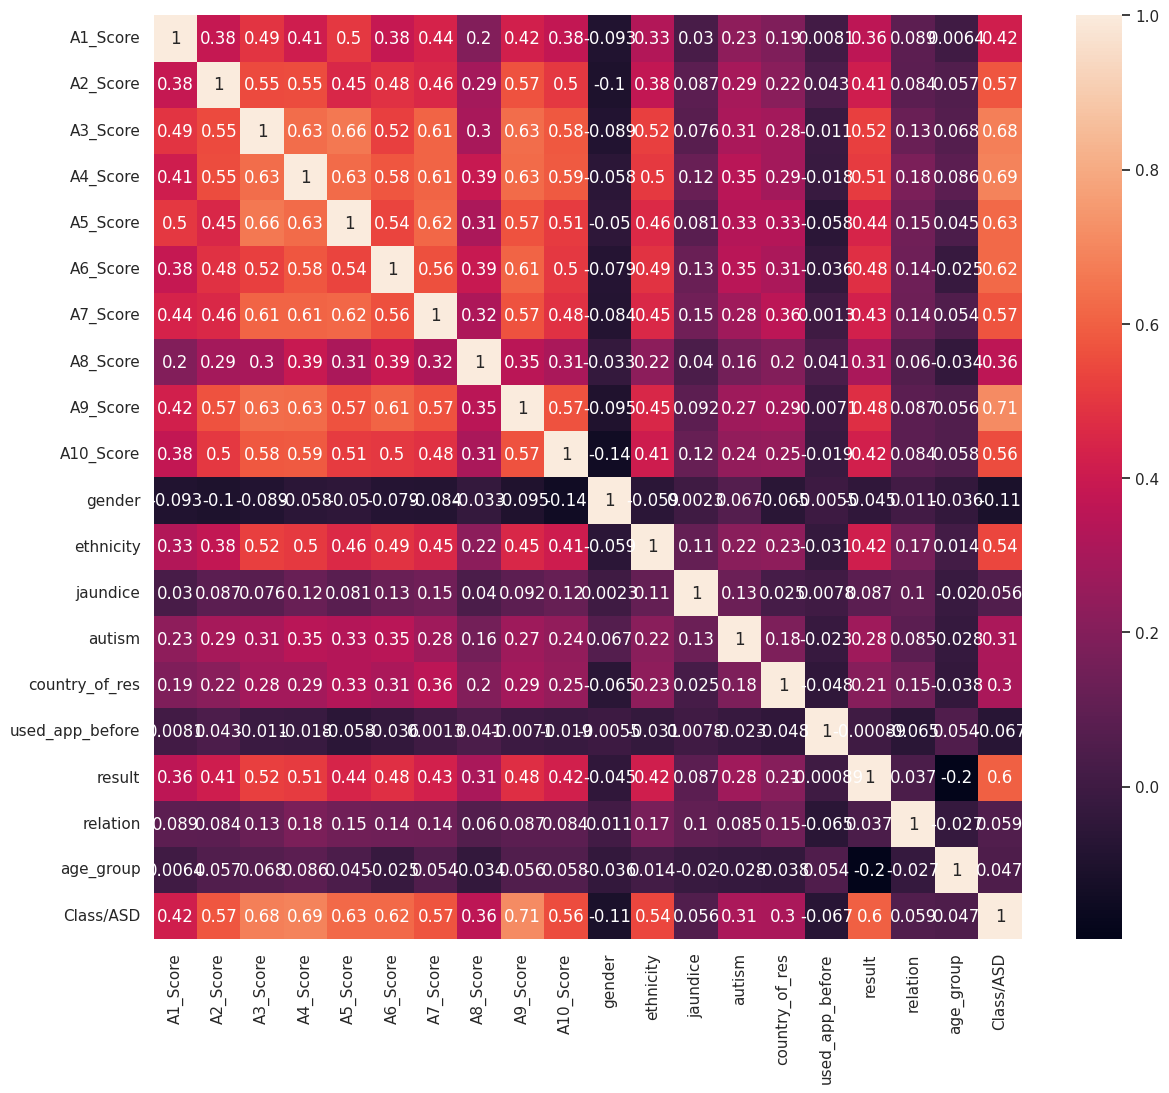

In [ ]:
corrMatrix = resampled_data.corr()
plt.figure(figsize = (14, 12))
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Dropping features based on above methods

In [ ]:
new_features = X_resampled.drop(['age_group','used_app_before','gender'], axis=1)
new_features

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,ethnicity,jaundice,autism,country_of_res,result,relation
0,0,0,0,0,0,0,0,0,0,0,5,0,0,25,2.255185,4
1,0,0,0,0,0,0,0,0,0,0,5,0,0,54,2.276617,4
2,0,0,0,0,0,0,0,0,0,0,5,0,0,46,-4.777286,4
3,1,0,0,0,0,1,0,0,1,1,4,0,0,31,9.562117,4
4,1,0,0,0,0,0,1,1,1,0,6,0,0,53,7.984569,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,1,1,0,1,1,0,0,1,0,1,1,0,1,15,12.708080,4
1108,1,1,1,1,0,0,0,0,1,1,5,0,0,32,12.840234,4
1109,1,1,1,1,1,1,1,1,1,1,9,0,0,53,11.125145,4
1110,1,1,1,1,1,1,1,1,1,1,9,0,0,53,11.023193,4


In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmaxscale = MinMaxScaler(feature_range = (0, 1))
scaled_features = minmaxscale.fit_transform(new_features)
scaled_features = pd.DataFrame(scaled_features)

# Splitting into train and test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features, y_resampled, train_size=0.8, random_state=1, stratify=y_resampled)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((889, 16), (889,), (223, 16), (223,))

# Multinomial Naive Bayes

In [ ]:
mnb = MultinomialNB(alpha=1.0, class_prior=[0.5,0.5])
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)


In [ ]:
confmat= pd.DataFrame(confusion_matrix(y_test,y_pred),
                     index=['True[0]','True[1]'],
                     columns=['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],79,18
True[1],6,120


In [ ]:
print('classification report')
print(classification_report(y_test,y_pred))

classification report
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        97
           1       0.87      0.95      0.91       126

    accuracy                           0.89       223
   macro avg       0.90      0.88      0.89       223
weighted avg       0.90      0.89      0.89       223



In [ ]:
TP = 120
TN = 79
FP = 18
FN = 6

Classification Accuracy:

In [ ]:
print('Accuracy - ', (TP + TN) / float(TP + TN + FP + FN))
print('Sensitivity/Recall -', metrics.recall_score(y_test, y_pred))
print('Specificity -', (TN / (TN + FP)))
print('Precision - ', metrics.precision_score(y_test, y_pred) )
print('False Positive Rate - ', (FP / float(TN + FP)))

Accuracy -  0.8923766816143498
Sensitivity/Recall - 0.9523809523809523
Specificity - 0.8144329896907216
Precision -  0.8695652173913043
False Positive Rate -  0.18556701030927836


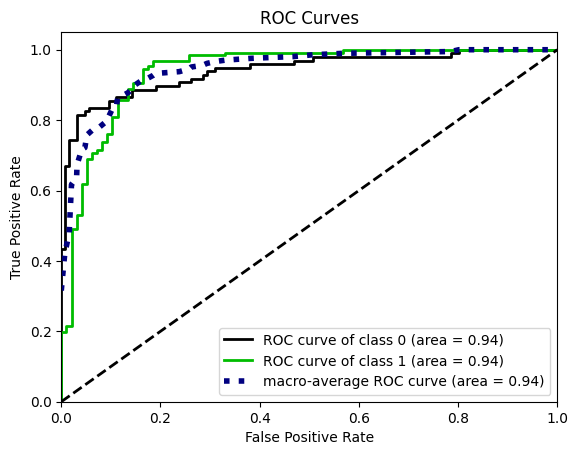

In [ ]:
skplt.metrics.plot_roc(y_test, mnb.predict_proba(x_test),plot_micro=False)
plt.show()

# Decision Tree Classifier

In [ ]:
tree = DecisionTreeClassifier(ccp_alpha=0.00520667,random_state=40)
tree.fit(x_train,y_train)
y_train_pred=tree.predict(x_train)
y_test_pred=tree.predict(x_test)

print(accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred))

0.937007874015748 0.9237668161434978


In [ ]:
tree.get_depth()

7

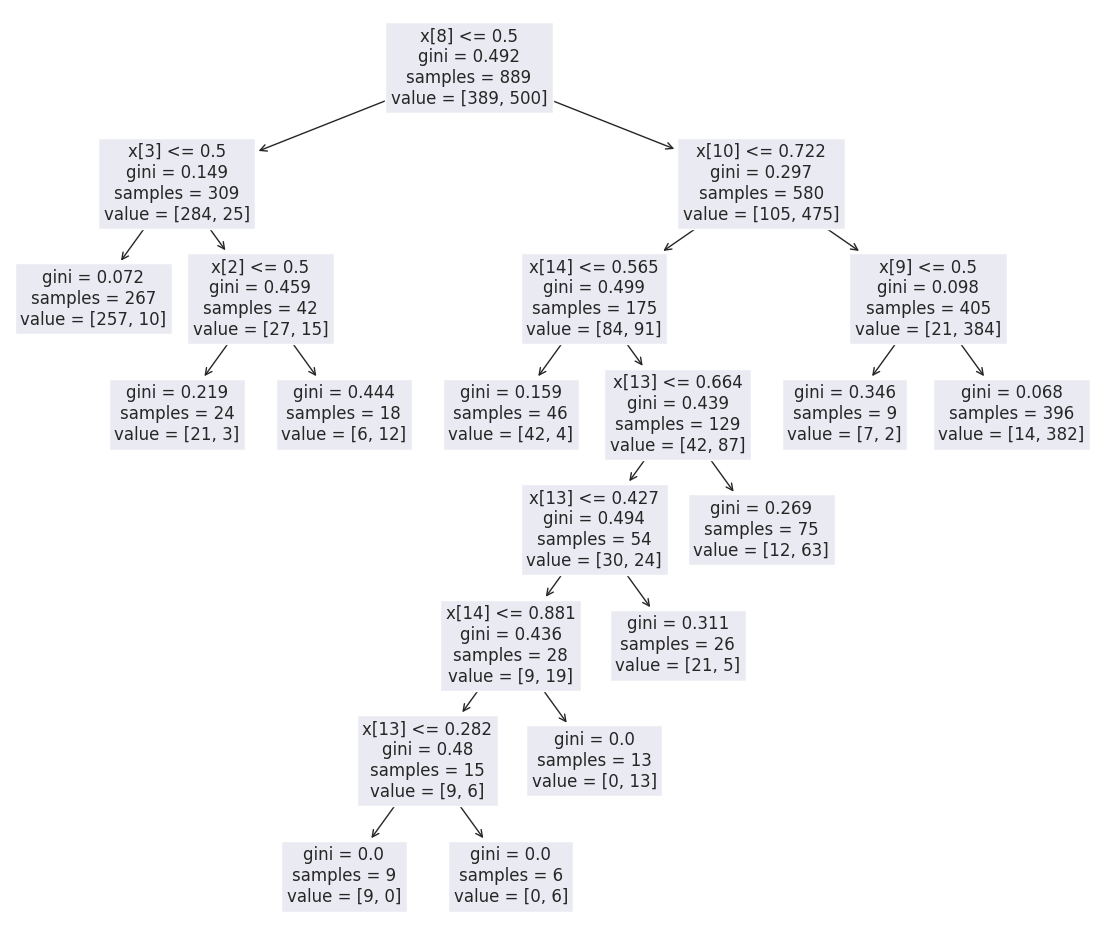

In [ ]:
plt.figure(figsize=(14,12))
plot_tree(tree,fontsize=12)
plt.show()

In [ ]:
confmat_RF= pd.DataFrame(confusion_matrix(y_test,y_test_pred),
                     index=['True[0]','True[1]'],
                     columns=['Predict[0]','Predict[1]'])
confmat_RF

,Predict[0],Predict[1]
True[0],84,13
True[1],4,122


In [ ]:
TP = 122
TN = 84
FP = 13
FN = 4

In [ ]:
print('classification report')
print(classification_report(y_test,y_test_pred))

classification report
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        97
           1       0.90      0.97      0.93       126

    accuracy                           0.92       223
   macro avg       0.93      0.92      0.92       223
weighted avg       0.93      0.92      0.92       223



Classification Accuracy:

In [ ]:
print('Accuracy - ', (TP + TN) / float(TP + TN + FP + FN))
print('Sensitivity/Recall -', metrics.recall_score(y_test, y_test_pred))
print('Specificity -', (TN / (TN + FP)))
print('Precision - ', metrics.precision_score(y_test, y_test_pred) )
print('False Positive Rate - ', (FP / float(TN + FP)))

Accuracy -  0.9237668161434978
Sensitivity/Recall - 0.9682539682539683
Specificity - 0.865979381443299
Precision -  0.9037037037037037
False Positive Rate -  0.13402061855670103


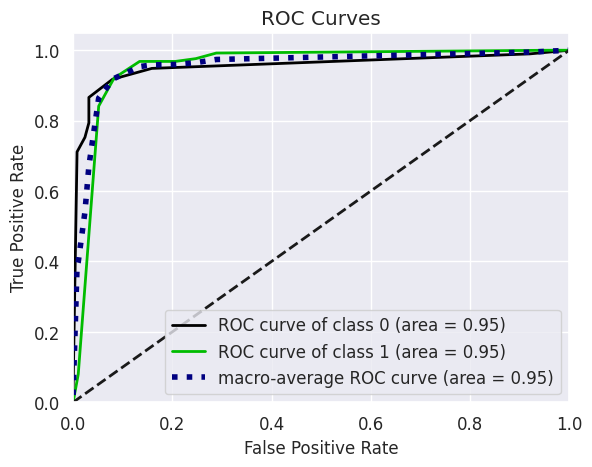

In [ ]:
skplt.metrics.plot_roc(y_test, tree.predict_proba(x_test),plot_micro=False)
plt.show()

# Random Forest Classifier

In [ ]:
RF_tree = RandomForestClassifier(ccp_alpha=0.0, random_state=40,max_depth=7)
RF_tree.fit(x_train,y_train)
y_train_pred_RF=RF_tree.predict(x_train)
y_test_pred_RF=RF_tree.predict(x_test)

print(accuracy_score(y_train,y_train_pred_RF),accuracy_score(y_test,y_test_pred_RF))

0.9865016872890888 0.9641255605381166


In [ ]:
confmat_RF= pd.DataFrame(confusion_matrix(y_test,y_test_pred_RF),
                     index=['True[0]','True[1]'],
                     columns=['Predict[0]','Predict[1]'])
confmat_RF

,Predict[0],Predict[1]
True[0],90,7
True[1],1,125


In [ ]:
TP = 125
TN = 90
FP = 7
FN = 1

Classification Accuracy:

In [ ]:
print('Accuracy - ', (TP + TN) / float(TP + TN + FP + FN))
print('Sensitivity/Recall -', metrics.recall_score(y_test, y_test_pred_RF))
print('Specificity -', (TN / (TN + FP)))
print('Precision - ', metrics.precision_score(y_test, y_test_pred_RF) )
print('False Positive Rate - ', (FP / float(TN + FP)))

Accuracy -  0.9641255605381166
Sensitivity/Recall - 0.9920634920634921
Specificity - 0.9278350515463918
Precision -  0.946969696969697
False Positive Rate -  0.07216494845360824


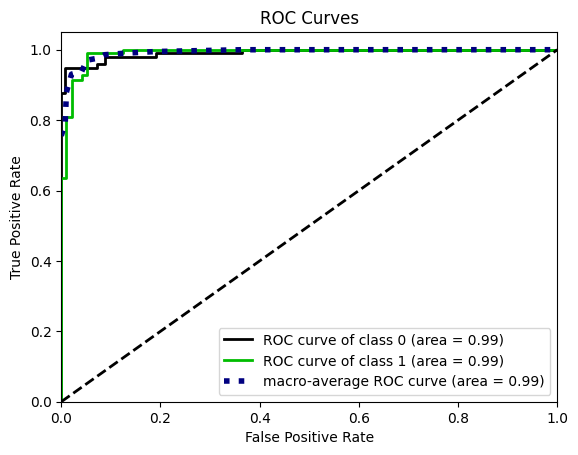

In [ ]:
skplt.metrics.plot_roc(y_test, RF_tree.predict_proba(x_test),plot_micro=False)
plt.show()

# Logistic Regression

In [ ]:
LR = LogisticRegression(solver='liblinear',penalty ='l2', random_state=1) #keeping deafult penalty L2
LR.fit(x_train,y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [ ]:
y_train_pred_LR=LR.predict(x_train)
y_pred_LR = LR.predict(x_test)

In [ ]:
print(accuracy_score(y_train,y_train_pred_LR),round(accuracy_score(y_test,y_pred_LR),2))

0.9122609673790776 0.91


In [ ]:
confmat_LR= pd.DataFrame(confusion_matrix(y_test,y_pred_LR),
                     index=['True[0]','True[1]'],
                     columns=['Predict[0]','Predict[1]'])
confmat_LR

,Predict[0],Predict[1]
True[0],82,15
True[1],5,121


In [ ]:
TP = 121
TN = 82
FP = 15
FN = 5

Classification Accuracy:

In [ ]:
print('Accuracy - ', (TP + TN) / float(TP + TN + FP + FN))
print('Sensitivity/Recall -', metrics.recall_score(y_test, y_pred_LR))
print('Specificity -', (TN / (TN + FP)))
print('Precision - ', metrics.precision_score(y_test, y_pred_LR) )
print('False Positive Rate - ', (FP / float(TN + FP)))

Accuracy -  0.9103139013452914
Sensitivity/Recall - 0.9603174603174603
Specificity - 0.845360824742268
Precision -  0.8897058823529411
False Positive Rate -  0.15463917525773196


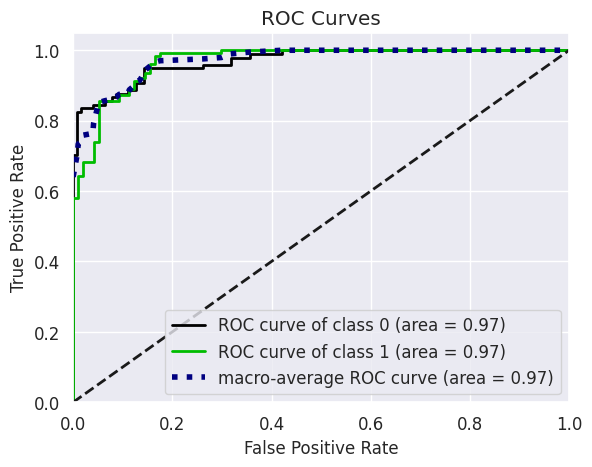

In [ ]:
skplt.metrics.plot_roc(y_test, LR.predict_proba(x_test),plot_micro=False)
plt.show()